## 8.1 Fashion Classification

### Download the dataset

In [1]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git


Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 21.55 MiB/s, done.
Resolving deltas: 100% (10/10), done.


## 8.2 Tensorflow and Keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

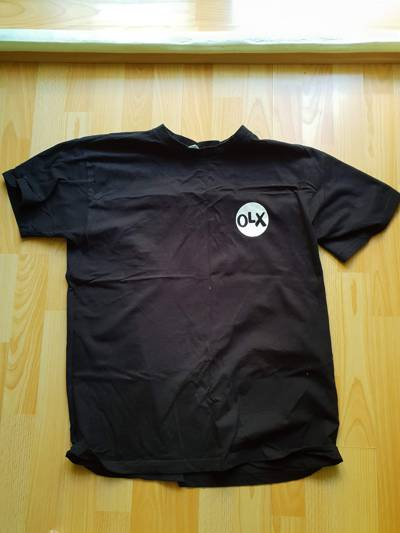

In [ ]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [ ]:
img = load_img(fullname, target_size=(299, 299))

In [ ]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained CNN

In [4]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions


In [ ]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

91884032/91884032 [==============================] - 1s 0us/step


In [ ]:
X=np.array([x])

In [ ]:
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)

In [ ]:
decode_predictions(pred)

## 8.5 Transfer Learning

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_gen = ImageDataGenerator(preprocessing_function =preprocess_input)

In [7]:
train_ds=train_gen.flow_from_directory('./clothing-dataset-small/train/',target_size=(150,150), batch_size = 32)

Found 3068 images belonging to 10 classes.


In [ ]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [ ]:
X, y = next(train_ds)

In [ ]:
X

In [ ]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [ ]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
val_gen = ImageDataGenerator(preprocessing_function =preprocess_input)

In [9]:
val_ds=val_gen.flow_from_directory('./clothing-dataset-small/validation/',target_size=(150,150), batch_size = 32, shuffle=False)

Found 341 images belonging to 10 classes.


In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False


inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
96/96 [==============================] - 273s 3s/step - loss: 1.3006 - accuracy: 0.6692 - val_loss: 0.7755 - val_accuracy: 0.7918
Epoch 2/10
96/96 [==============================] - 265s 3s/step - loss: 0.5357 - accuracy: 0.8256 - val_loss: 1.0662 - val_accuracy: 0.7449
Epoch 3/10
96/96 [==============================] - 265s 3s/step - loss: 0.3541 - accuracy: 0.8787 - val_loss: 0.8451 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 263s 3s/step - loss: 0.2213 - accuracy: 0.9195 - val_loss: 0.9999 - val_accuracy: 0.7713
Epoch 5/10
96/96 [==============================] - 264s 3s/step - loss: 0.2191 - accuracy: 0.9218 - val_loss: 0.9769 - val_accuracy: 0.7889
Epoch 6/10
96/96 [==============================] - 261s 3s/step - loss: 0.1183 - accuracy: 0.9586 - val_loss: 0.7988 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] - 263s 3s/step - loss: 0.0652 - accuracy: 0.9814 - val_loss: 0.8595 - val_accuracy: 0.8065
Epoch 8/10
96

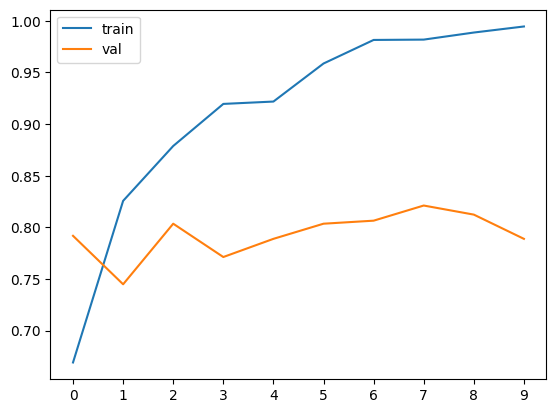

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [ ]:
def make_model (learning_rate=0.01):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
  )
  base_model.trainable = False

  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)
  outputs = keras.layers.Dense(10)(vectors)
  model = keras.Model(inputs, outputs)

  optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)
  model.compile(optimizer = optimizer, loss= loss, metrics=["accuracy"])

  return model

In [ ]:
scores ={}
for lr in [ 0.001, 0.01]:
  print(lr)
  model = make_model(learning_rate=lr)
  history = model.fit(train_ds, epochs=7, validation_data=val_ds)
  scores[lr] = history.history


0.001
83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/7
96/96 [==============================] - 285s 3s/step - loss: 1.0764 - accuracy: 0.6415 - val_loss: 0.7103 - val_accuracy: 0.7830
Epoch 2/7
96/96 [==============================] - 279s 3s/step - loss: 0.6302 - accuracy: 0.7787 - val_loss: 0.6589 - val_accuracy: 0.7918
Epoch 3/7
96/96 [==============================] - 276s 3s/step - loss: 0.5043 - accuracy: 0.8318 - val_loss: 0.6065 - val_accuracy: 0.8006
Epoch 4/7
96/96 [==============================] - 261s 3s/step - loss: 0.4339 - accuracy: 0.8563 - val_loss: 0.5737 - val_accuracy: 0.8182
Epoch 5/7
96/96 [==============================] - 276s 3s/step - loss: 0.3675 - accuracy: 0.8885 - val_loss: 0.5582 - val_accuracy: 0.8006
Epoch 6/7
96/96 [==============================] - 276s 3s/step - loss: 0.3219 - accuracy: 0.9110 - val_loss: 0.5509 - val_accuracy: 0.8152
Epoch 7/7
96/96 [==============================] - 275s 3s/step - loss: 0.2893 - accuracy

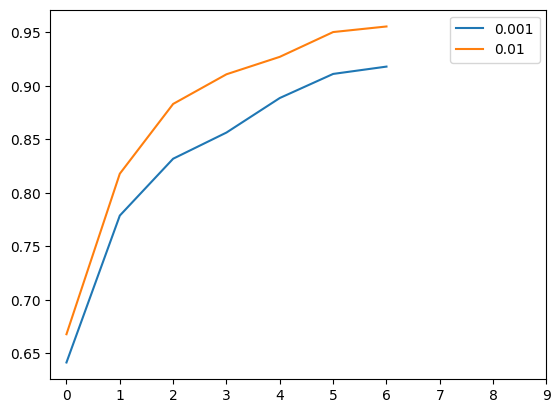

In [ ]:
for lr, hist in scores.items():
  plt.plot(hist['accuracy'], label=lr)
plt.xticks(np.arange(10))
plt.legend()

## 8.7 Checkpointing


*   Saving the best model only
*   Training a model with callbacks



In [ ]:
model.save_weights('model_v1.h5', save_format = 'h5')

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
                                save_best_only = True,
                                monitor='val_accuracy',
                                mode = max

)

In [ ]:
lr =0.001
model = make_model(learning_rate=lr)
history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.0812 - accuracy: 0.6271

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 282s 3s/step - loss: 1.0812 - accuracy: 0.6271 - val_loss: 0.7668 - val_accuracy: 0.7537
Epoch 2/10
96/96 [==============================] - 275s 3s/step - loss: 0.6262 - accuracy: 0.7829 - val_loss: 0.6916 - val_accuracy: 0.7771
Epoch 3/10
96/96 [==============================] - 261s 3s/step - loss: 0.5161 - accuracy: 0.8227 - val_loss: 0.6092 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 276s 3s/step - loss: 0.4272 - accuracy: 0.8677 - val_loss: 0.5817 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 274s 3s/step - loss: 0.3731 - accuracy: 0.8889 - val_loss: 0.5960 - val_accuracy: 0.7947
Epoch 6/10
96/96 [==============================] - 274s 3s/step - loss: 0.3319 - accuracy: 0.9012 - val_loss: 0.5850 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] - 280s 3s/step - loss: 0.2905 - accuracy: 0.9208 - val_loss: 0.5644 - val_accuracy: 0.8094
Epoch 8/10
96/96 [======

## Adding More Layers

In [ ]:
def make_model (learning_rate=0.01, size_inner=100 ):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
  )
  base_model.trainable = False

  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)
  inner = keras.layers.Dense(size_inner, activation ='relu')(vectors)
  outputs = keras.layers.Dense(10)(inner)
  model = keras.Model(inputs, outputs)

  optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)
  model.compile(optimizer = optimizer, loss= loss, metrics=["accuracy"])

  return model

In [ ]:
lr =0.001
scores ={}
for size in [10,100,1000]:
  print(size)
  model = make_model(learning_rate=lr, size_inner=size)
  history = model.fit(train_ds, epochs=7, validation_data=val_ds)
  scores[size] = history.history
  print()


0.001
Epoch 1/7
96/96 [==============================] - 302s 3s/step - loss: 1.4985 - accuracy: 0.4915 - val_loss: 1.0849 - val_accuracy: 0.6598
Epoch 2/7
96/96 [==============================] - 290s 3s/step - loss: 0.9111 - accuracy: 0.6982 - val_loss: 0.8336 - val_accuracy: 0.7243
Epoch 3/7
96/96 [==============================] - 289s 3s/step - loss: 0.7100 - accuracy: 0.7601 - val_loss: 0.7154 - val_accuracy: 0.7507
Epoch 4/7
96/96 [==============================] - 291s 3s/step - loss: 0.5815 - accuracy: 0.8041 - val_loss: 0.6331 - val_accuracy: 0.8006
Epoch 5/7
96/96 [==============================] - 289s 3s/step - loss: 0.4796 - accuracy: 0.8429 - val_loss: 0.6086 - val_accuracy: 0.7859
Epoch 6/7
96/96 [==============================] - 288s 3s/step - loss: 0.3998 - accuracy: 0.8739 - val_loss: 0.5738 - val_accuracy: 0.8123
Epoch 7/7
96/96 [==============================] - 277s 3s/step - loss: 0.3490 - accuracy: 0.8934 - val_loss: 0.5304 - val_accuracy: 0.8123
0.001
Epoch 1/

In [ ]:
scores

NameError: ignored

In [ ]:
for size, hist in scores.items():
  plt.plot(hist['accuracy'], label=size)
plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0,83])
plt.legend()

## 8.9 - Regularization and Dropout

In [12]:
def make_model (learning_rate=0.01, size_inner=100, drop_rate =0.5 ):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
  )
  base_model.trainable = False

  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)
  inner = keras.layers.Dense(size_inner, activation ='relu')(vectors)
  drop = keras.layers.Dropout(drop_rate)(inner)
  outputs = keras.layers.Dense(10)(drop)
  model = keras.Model(inputs, outputs)

  optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)
  model.compile(optimizer = optimizer, loss= loss, metrics=["accuracy"])

  return model

In [15]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5]:
  print(droprate)

  model = make_model(learning_rate=learning_rate, size_inner=size, drop_rate= droprate)
  history = model.fit(train_ds, epochs=5, validation_data=val_ds)
  scores[droprate] = history.history
  print()

0.0
Epoch 1/5
96/96 [==============================] - 295s 3s/step - loss: 0.9503 - accuracy: 0.6718 - val_loss: 0.6267 - val_accuracy: 0.7889
Epoch 2/5
96/96 [==============================] - 287s 3s/step - loss: 0.5043 - accuracy: 0.8230 - val_loss: 0.5788 - val_accuracy: 0.7947
Epoch 3/5
96/96 [==============================] - 271s 3s/step - loss: 0.3695 - accuracy: 0.8761 - val_loss: 0.5813 - val_accuracy: 0.8152
Epoch 4/5
96/96 [==============================] - 290s 3s/step - loss: 0.2648 - accuracy: 0.9169 - val_loss: 0.5393 - val_accuracy: 0.8211
Epoch 5/5
96/96 [==============================] - 274s 3s/step - loss: 0.1627 - accuracy: 0.9583 - val_loss: 0.5514 - val_accuracy: 0.8094

0.2
Epoch 1/5
96/96 [==============================] - 291s 3s/step - loss: 1.0681 - accuracy: 0.6398 - val_loss: 0.6462 - val_accuracy: 0.7977
Epoch 2/5
96/96 [==============================] - 275s 3s/step - loss: 0.6215 - accuracy: 0.7826 - val_loss: 0.6092 - val_accuracy: 0.8094
Epoch 3/5
9

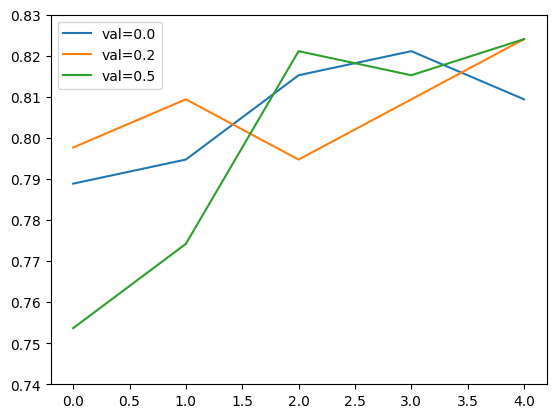

In [22]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.74, 0.83)
plt.legend()

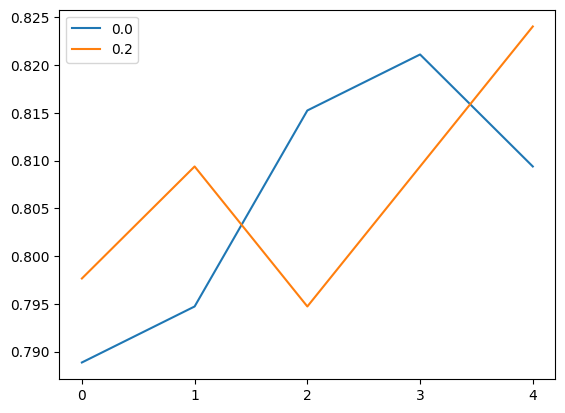

In [24]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)
plt.xticks(np.arange(5))
plt.legend()

## 8.10 Data Augmentation

*   rotate
*   flip vertical/horizontal
*   shear
*   shift
*   zoom in/out
*   brightness
*   etc. ...
*   their combinations

In [25]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    vertical_flip=True,
    shear_range=10.0,
    zoom_range = 0.1
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [27]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    drop_rate=droprate
)

history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
96/96 [==============================] - 315s 3s/step - loss: 1.3209 - accuracy: 0.5567 - val_loss: 0.7866 - val_accuracy: 0.7273
Epoch 2/5
96/96 [==============================] - 314s 3s/step - loss: 0.9057 - accuracy: 0.6982 - val_loss: 0.7291 - val_accuracy: 0.7537
Epoch 3/5
96/96 [==============================] - 308s 3s/step - loss: 0.7751 - accuracy: 0.7334 - val_loss: 0.6458 - val_accuracy: 0.7889
Epoch 4/5
96/96 [==============================] - 296s 3s/step - loss: 0.7077 - accuracy: 0.7565 - val_loss: 0.6011 - val_accuracy: 0.8123
Epoch 5/5
96/96 [==============================] - 308s 3s/step - loss: 0.6967 - accuracy: 0.7601 - val_loss: 0.6652 - val_accuracy: 0.7859


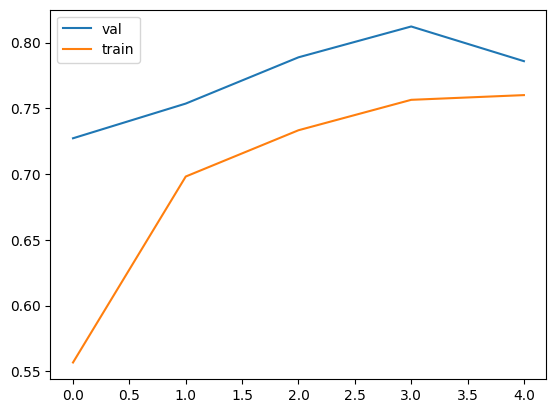

In [28]:

hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

In [34]:
def make_model (input_size =150, learning_rate=0.01, size_inner=100, drop_rate =0.5 ):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(input_size, input_size, 3)
  )
  base_model.trainable = False

  inputs = keras.Input(shape=(input_size, input_size, 3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)
  inner = keras.layers.Dense(size_inner, activation ='relu')(vectors)
  drop = keras.layers.Dropout(drop_rate)(inner)
  outputs = keras.layers.Dense(10)(drop)
  model = keras.Model(inputs, outputs)

  optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)
  model.compile(optimizer = optimizer, loss= loss, metrics=["accuracy"])

  return model

In [35]:
input_size = 299
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [36]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)


In [37]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    drop_rate=droprate
)

history = model.fit(train_ds, epochs=5, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/5
96/96 [==============================] - ETA: 0s - loss: 1.0527 - accuracy: 0.6626 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 1456s 15s/step - loss: 1.0527 - accuracy: 0.6626 - val_loss: 0.5779 - val_accuracy: 0.8211
Epoch 2/5
96/96 [==============================] - 1508s 16s/step - loss: 0.5392 - accuracy: 0.8220 - val_loss: 0.4539 - val_accuracy: 0.8710
Epoch 3/5
96/96 [==============================] - 1460s 15s/step - loss: 0.4528 - accuracy: 0.8432 - val_loss: 0.4170 - val_accuracy: 0.8710
Epoch 4/5
96/96 [==============================] - 1452s 15s/step - loss: 0.3897 - accuracy: 0.8605 - val_loss: 0.3793 - val_accuracy: 0.8856
Epoch 5/5
96/96 [==============================] - 1399s 15s/step - loss: 0.3534 - accuracy: 0.8801 - val_loss: 0.3745 - val_accuracy: 0.8798


## Using the model

In [38]:
import tensorflow as tf
from tensorflow import keras

In [40]:
model = keras.models.load_model('xception_v4_1_04_0.886.h5')

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [42]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [43]:
model.evaluate(test_ds)

12/12 [==============================] - 145s 12s/step - loss: 0.3026 - accuracy: 0.9059


[0.30255329608917236, 0.9059139490127563]

In [44]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
img = load_img(path, target_size=(299, 299))

In [45]:
import numpy as np
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [46]:
X = preprocess_input(X)
pred = model.predict(X)


1/1 [==============================] - 2s 2s/step


In [47]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [48]:
dict(zip(classes, pred[0]))

{'dress': -2.4114265,
 'hat': -2.7880542,
 'longsleeve': -0.7236076,
 'outwear': -1.4588594,
 'pants': 7.111231,
 'shirt': -0.7189747,
 'shoes': -3.1297252,
 'shorts': 2.6281657,
 'skirt': -3.4167917,
 't-shirt': -2.2799196}